<a href="https://colab.research.google.com/github/kanakesh2006/Credit_Card_Fraud_Prediction/blob/main/Credit_Card_Fraud_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mlg_ulb_creditcardfraud_path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')

print('Data source import complete.')


Using Colab cache for faster access to the 'creditcardfraud' dataset.
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Load the required dataset

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# Handling Imbalencies

In [7]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [8]:
legit_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

In [9]:
legit_df.shape

(284315, 31)

In [10]:
fraud_df.shape

(492, 31)

In [11]:
legit_sample = legit_df.sample(n=500, random_state = 42)
legit_sample.shape

(500, 31)

In [12]:
final_df = pd.concat([legit_sample,fraud_df])
final_df.shape

(992, 31)

# Handling Outliers

In [13]:
for col in final_df.select_dtypes(include = ['number']).columns:
    q1 = final_df[col].quantile(0.25)
    q3 = final_df[col].quantile(0.75)

    upper_bound = q3 + 1.5 * (q3 - q1)
    lower_bound = q1 - 1.5 * (q3 - q1)

    final_df[col] = final_df[col].clip(lower = lower_bound, upper = upper_bound)

# Feature Selection

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

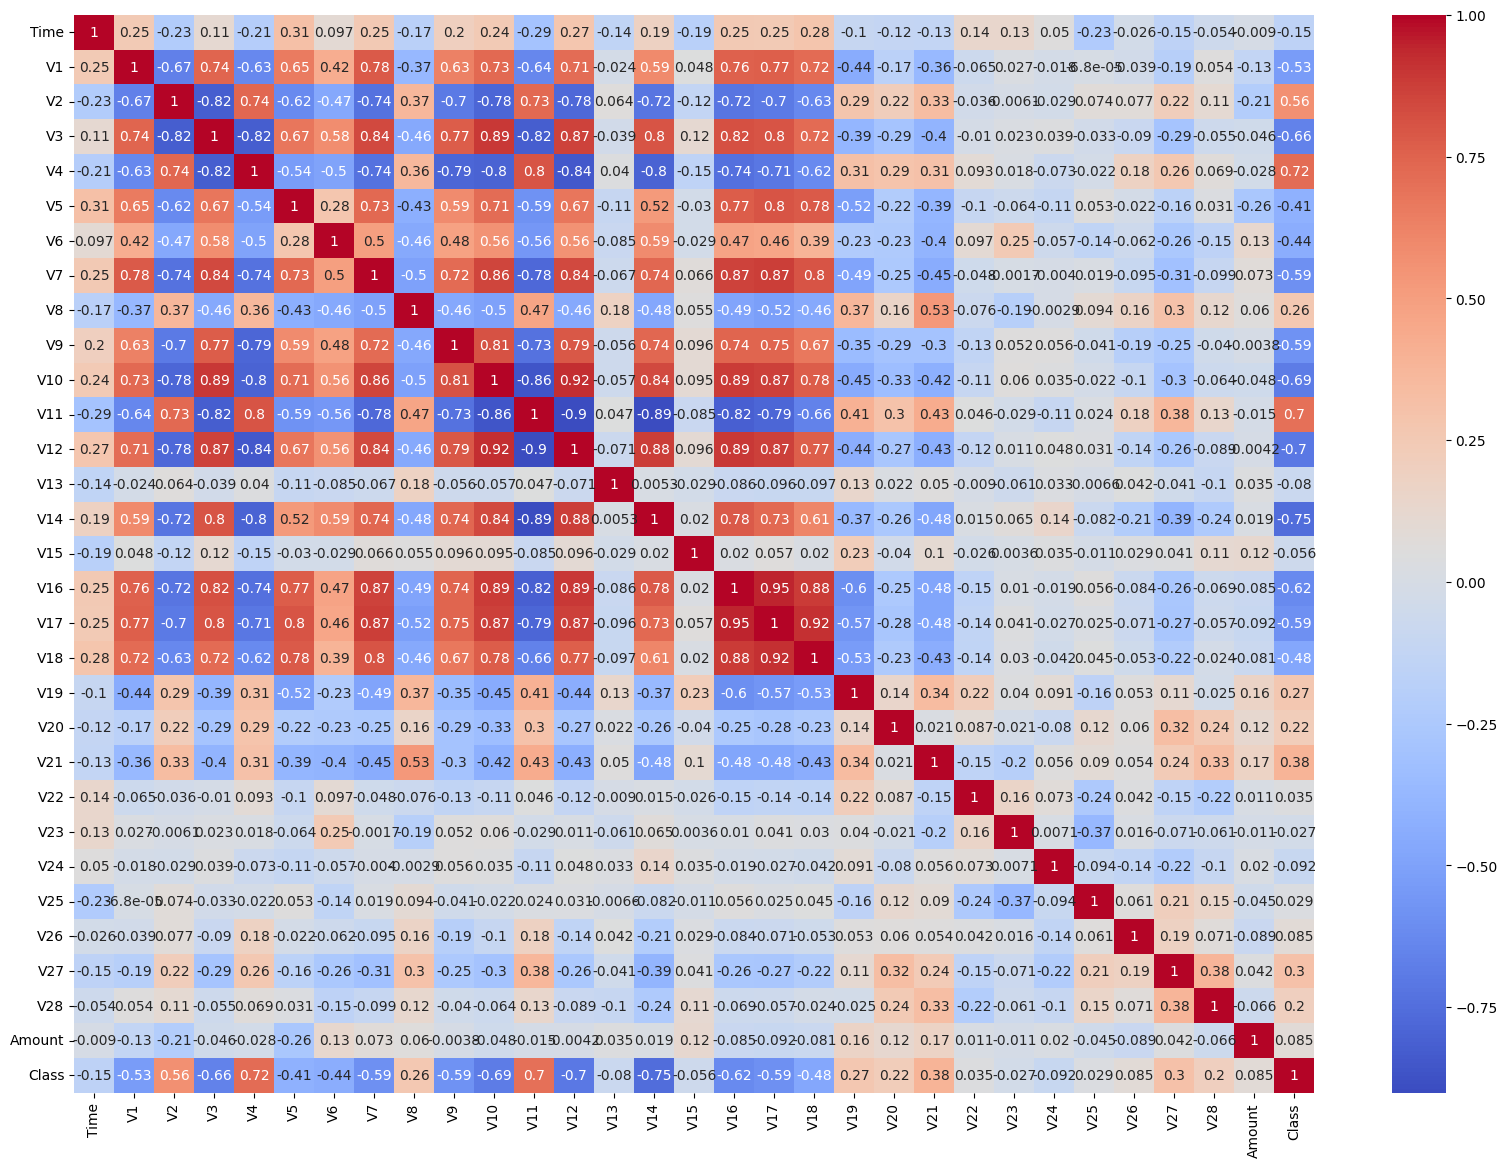

In [15]:
corr_mat = final_df.corr()
plt.figure(figsize = (20,14))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [16]:
print(final_df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [17]:
X = final_df.drop(['Class', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28' ],axis = 1)
y = final_df['Class']
columns=X.columns

from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()

X_scaled = mc.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=columns)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,Amount
0,0.478360,0.904868,0.438552,0.764134,0.344281,0.603820,0.443991,0.632694,0.361239,0.592990,...,0.523471,0.778903,0.695475,0.794643,0.698231,0.618671,0.426663,0.425032,0.374107,0.003062
1,0.292389,0.711073,0.488860,0.861399,0.342836,0.594585,0.565706,0.640676,0.459409,0.530963,...,0.499121,0.858926,0.572070,0.745063,0.642124,0.669674,0.611090,0.416088,0.487870,0.016841
2,0.319041,0.748448,0.367786,0.874866,0.211115,0.498940,0.615223,0.550868,0.421169,0.346423,...,0.697594,0.814119,0.624498,0.684812,0.693489,0.704730,0.846276,0.472625,0.385350,0.060434
3,0.677309,0.778787,0.478705,0.744272,0.295222,0.589834,0.410312,0.661723,0.458393,0.591252,...,0.375088,0.809285,0.650901,0.767558,0.701793,0.692806,0.416715,0.382089,0.534673,0.229649
4,0.524911,0.953830,0.420164,0.822071,0.551391,0.580000,0.760429,0.549319,0.481610,0.673539,...,0.832809,0.895810,0.085299,0.852601,0.645261,0.679376,0.145282,0.338606,0.457727,0.000000


# Scaling and model training

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    results.append((name, acc, prec, rec, f1))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

results_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.944724,0.950105,0.944724,0.944476
1,Logistic Regression,0.934673,0.938127,0.934673,0.934464
2,KNN Classifier,0.909548,0.913519,0.909548,0.909203


/tmp/ipython-input-3437049780.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(results_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')


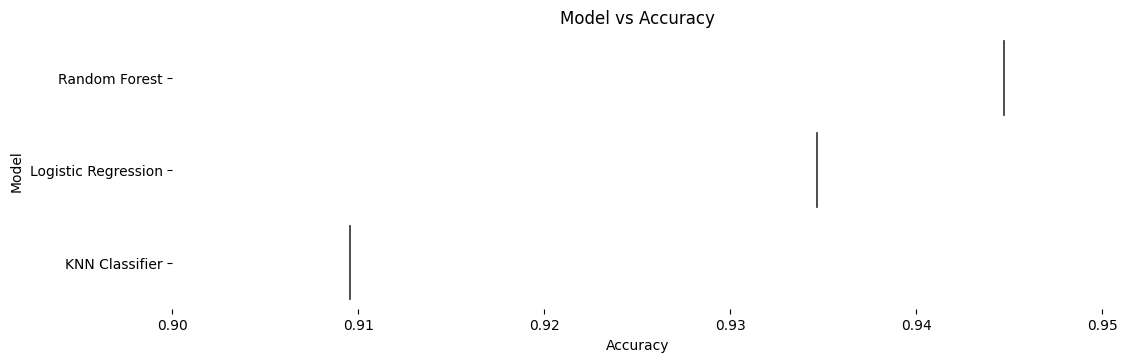

In [21]:
# Model vs Accuracy
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
plt.title('Model vs Accuracy')
plt.xlim(0.90, 0.95)  # Setting the x-axis limits
sns.despine(top=True, right=True, bottom=True, left=True)

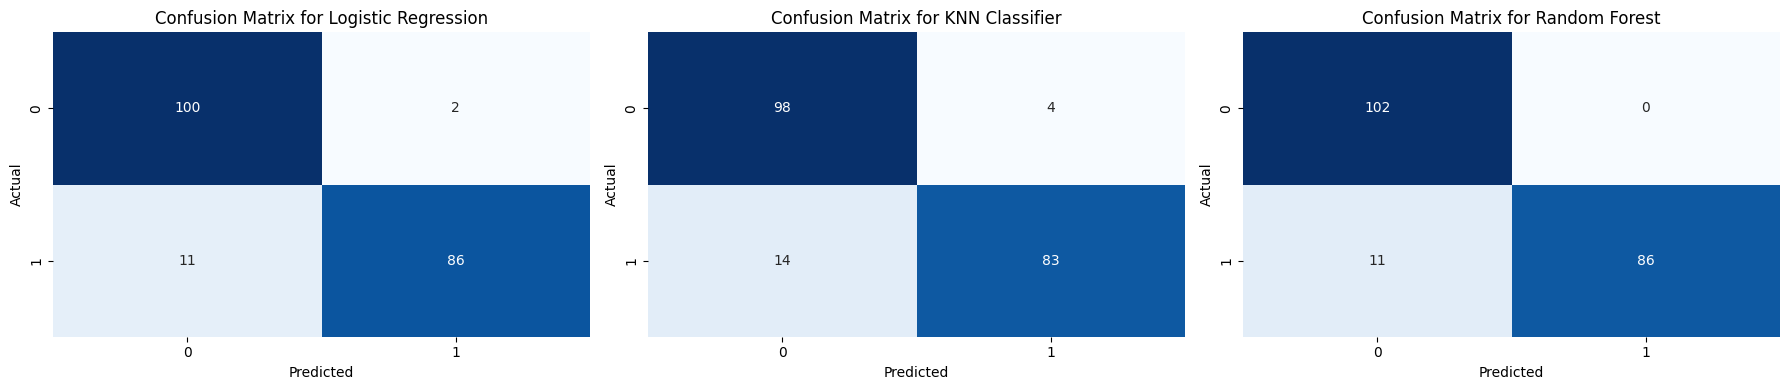

In [22]:
# Create a confusion matrix figure with subplots
fig, axes = plt.subplots(1, len(models), figsize=(6 * len(models), 4))

for i, (name, model) in enumerate(models.items()):
    preds = model.predict(x_test)
    cm = confusion_matrix(y_test, preds)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()